<a href="https://colab.research.google.com/github/CASAttackZW2025/CAS502Project/blob/main/CAS502testv01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install simpy


Job 0 arrives at 0.19
Job 0 starts processing at 0.19
Job 1 arrives at 0.42
Job 2 arrives at 0.63
Job 0 finishes at 0.70
Job 1 starts processing at 0.70
Job 1 finishes at 0.78
Job 2 starts processing at 0.78
Job 3 arrives at 0.89
Job 2 finishes at 1.87
Job 3 starts processing at 1.87
Job 4 arrives at 2.49
Job 3 finishes at 2.53
Job 4 starts processing at 2.53
Job 4 finishes at 4.27
Job 5 arrives at 4.36
Job 5 starts processing at 4.36
Job 6 arrives at 4.64
Job 7 arrives at 5.03
Job 5 finishes at 5.05
Job 6 starts processing at 5.05
Job 6 finishes at 5.80
Job 7 starts processing at 5.80
Job 8 arrives at 6.23
Job 7 finishes at 6.52
Job 8 starts processing at 6.52
Job 9 arrives at 6.96
Job 10 arrives at 7.40
Job 8 finishes at 7.61
Job 9 starts processing at 7.61
Job 9 finishes at 7.69
Job 10 starts processing at 7.69
Job 11 arrives at 7.88
Job 12 arrives at 7.97
Job 10 finishes at 8.31
Job 11 starts processing at 8.31
Job 13 arrives at 9.75
Job 11 finishes at 9.76
Job 12 starts processing

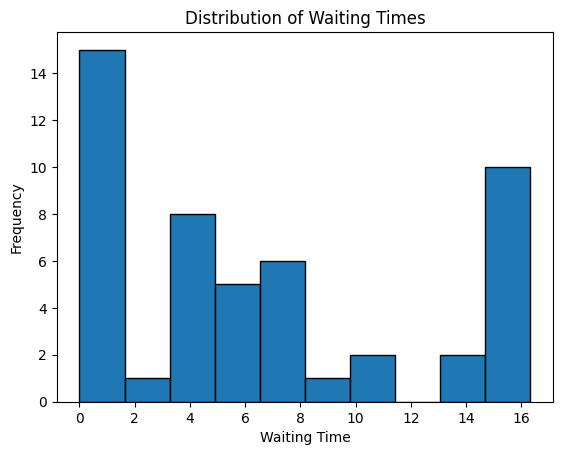

In [4]:
import simpy
import random
import matplotlib.pyplot as plt

num_jobs = 50
arrival_rate = 1.0
processing_rate = 1.0


def job(env, name, processor, wait_times):
    arrival_time = env.now
    print(f'Job {name} arrives at {arrival_time:.2f}')
    with processor.request() as request:
        yield request
        start_time = env.now
        print(f'Job {name} starts processing at {start_time:.2f}')
        processing_time = random.expovariate(processing_rate)
        yield env.timeout(processing_time)
        finish_time = env.now
        print(f'Job {name} finishes at {finish_time:.2f}')
        wait_time = start_time - arrival_time
        wait_times.append(wait_time)

def job_generator(env, processor, wait_times):
    for i in range(num_jobs):
        yield env.timeout(random.expovariate(arrival_rate))
        env.process(job(env, i, processor, wait_times))

def run_simulation():
    env = simpy.Environment()
    processor = simpy.Resource(env, capacity=1)
    wait_times = []
    env.process(job_generator(env, processor, wait_times))
    env.run()
    print(f"Average waiting time: {sum(wait_times)/len(wait_times):.2f}")
    plt.hist(wait_times, bins=10, edgecolor='black')
    plt.title('Distribution of Waiting Times')
    plt.xlabel('Waiting Time')
    plt.ylabel('Frequency')
    plt.show()

# Run simulation
run_sim()
